In [1]:
# Import all the necessary modules and packages for our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, r2_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read in the CSV
csv = pd.read_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\medical_clean.csv')

# Use .head() function to make sure dataframe has been created correctly
csv.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [2]:
# Create a DF with only the columns needed to answer the research question
df = csv.iloc[:, 14:42]

In [3]:
# Get a sense of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arthr

In [4]:
# Check for missing values
df.isnull().sum()

Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

In [5]:
# Check for duplicated values within the dataset
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [6]:
# Mapping categorical data to nominal
df['Marital'] = df['Marital'].map({'Divorced':0, 'Married':1, 'Never Married':2, 'Separated':3, 'Widowed':4}) 
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1, 'Nonbinary':3}) 
df['ReAdmis'] = df['ReAdmis'].map({'No':0, 'Yes':1}) 
df['Soft_drink'] = df['Soft_drink'].map({'No':0, 'Yes':1}) 
df['Initial_admin'] = df['Initial_admin'].map({'Elective Admission':0, 'Emergency Admission':1, 'Observation Admission':2}) 
df['HighBlood'] = df['HighBlood'].map({'No':0, 'Yes':1}) 
df['Stroke'] = df['Stroke'].map({'No':0, 'Yes':1}) 
df['Complication_risk'] = df['Complication_risk'].map({'Low':0, 'Medium':1, 'High':2}) 
df['Overweight'] = df['Overweight'].map({'No':0, 'Yes':1}) 
df['Arthritis'] = df['Arthritis'].map({'No':0, 'Yes':1}) 
df['Diabetes'] = df['Diabetes'].map({'No':0, 'Yes':1}) 
df['Hyperlipidemia'] = df['Hyperlipidemia'].map({'No':0, 'Yes':1}) 
df['BackPain'] = df['BackPain'].map({'No':0, 'Yes':1}) 
df['Anxiety'] = df['Anxiety'].map({'No':0, 'Yes':1}) 
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].map({'No':0, 'Yes':1})
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].map({'No':0, 'Yes':1})
df['Asthma'] = df['Asthma'].map({'No':0, 'Yes':1})
df['Services'] = df['Services'].map({'Blood Work':0, 'CT Scan':1, 'Intravenous':2, 'MRI':3})

In [7]:
X = df.drop(['ReAdmis'], axis=1)  # Features
y = df['ReAdmis']  # Target variable

counts = df['ReAdmis'].value_counts()
print(counts)
      
# Select the top features 
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

ReAdmis
0    6331
1    3669
Name: count, dtype: int64
Index(['Children', 'Age', 'Income', 'Marital', 'Full_meals_eaten', 'BackPain',
       'Asthma', 'Initial_days', 'TotalCharge', 'Additional_charges'],
      dtype='object')


In [8]:
df = df[['Children', 'Age', 'Income', 'Marital', 'Full_meals_eaten', 'BackPain',
          'Asthma','Initial_days', 'TotalCharge', 'Additional_charges', 'ReAdmis']]

<Axes: ylabel='Initial_days'>

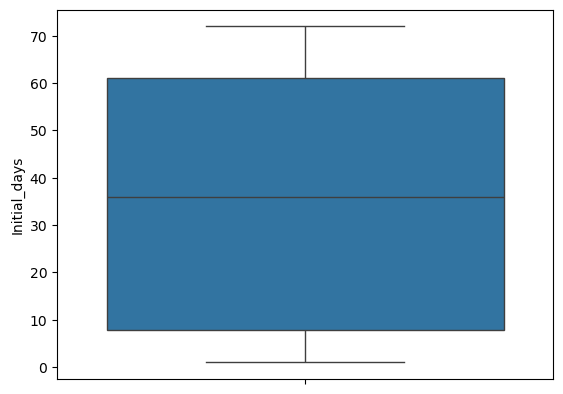

In [9]:
# Check for outliers
sns.boxplot(df['Initial_days'])

<Axes: ylabel='TotalCharge'>

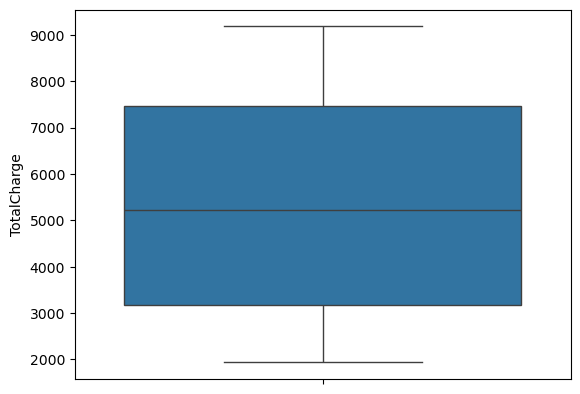

In [10]:
sns.boxplot(df['TotalCharge'])

<Axes: ylabel='Children'>

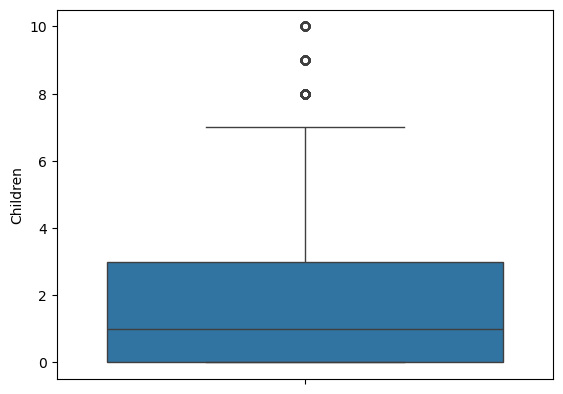

In [11]:
sns.boxplot(df['Children'])

<Axes: ylabel='Age'>

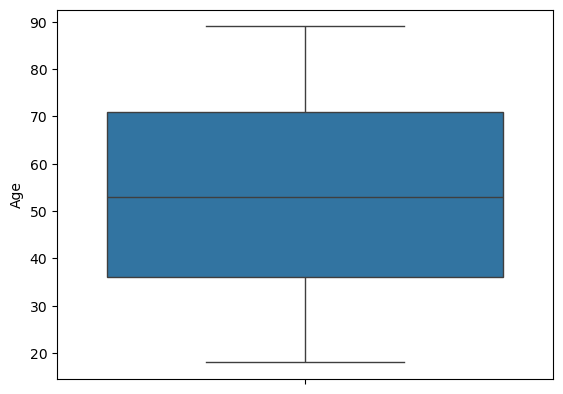

In [12]:
sns.boxplot(df['Age'])

<Axes: ylabel='Income'>

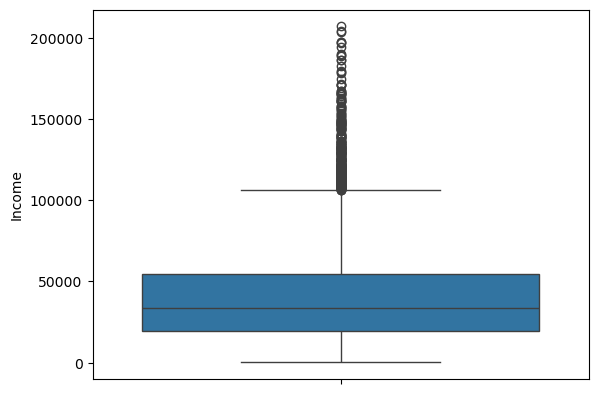

In [13]:
sns.boxplot(df['Income'])

0       1.615914
1       0.221443
2       0.915870
3       0.026263
4       1.377325
          ...   
9995    0.192047
9996    0.894380
9997    0.891569
9998    0.378271
9999    0.778133
Name: Income, Length: 10000, dtype: float64


<Axes: ylabel='Income'>

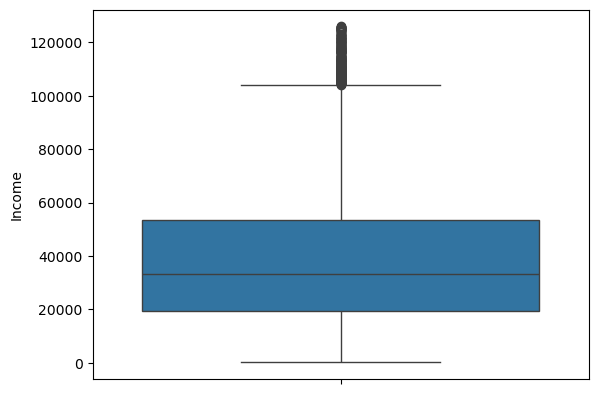

In [14]:
# This will calculate the z-score for the column (GeeksforGeeks, 2021)
z = np.abs(stats.zscore(df['Income']))
print(z)

# After finding the z-score, we set our threshold to 3, for 3 standard deviations, and remove any outliers
# outside of 3 standard deviations (GeeksforGeeks, 2021)
threshold_z = 3
 
outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)

# Boxplot after removing any outliers with more than three standard deviations
sns.boxplot(df['Income'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9857 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            9857 non-null   int64  
 1   Age                 9857 non-null   int64  
 2   Income              9857 non-null   float64
 3   Marital             9857 non-null   int64  
 4   Full_meals_eaten    9857 non-null   int64  
 5   BackPain            9857 non-null   int64  
 6   Asthma              9857 non-null   int64  
 7   Initial_days        9857 non-null   float64
 8   TotalCharge         9857 non-null   float64
 9   Additional_charges  9857 non-null   float64
 10  ReAdmis             9857 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 924.1 KB


<Axes: ylabel='Full_meals_eaten'>

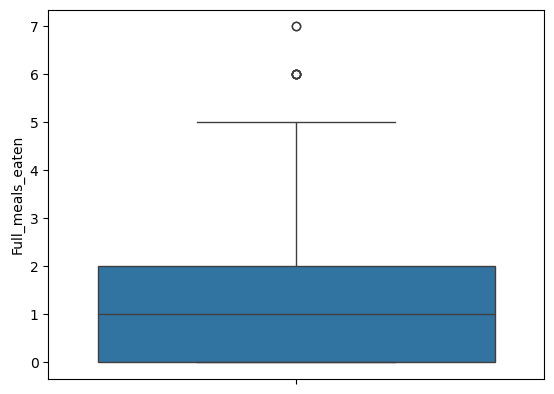

In [16]:
sns.boxplot(df['Full_meals_eaten'])

0       0.994142
1       0.990518
2       0.001812
3       0.001812
4       0.994142
          ...   
9995    0.990518
9996    0.994142
9997    0.990518
9998    0.990518
9999    0.994142
Name: Full_meals_eaten, Length: 9857, dtype: float64


<Axes: ylabel='Full_meals_eaten'>

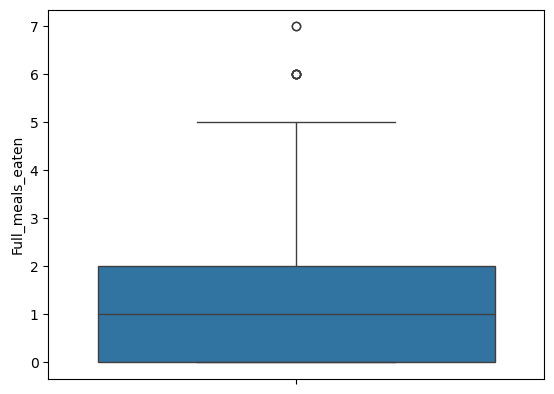

In [17]:
# This will calculate the z-score for the column (GeeksforGeeks, 2021)
z = np.abs(stats.zscore(df['Full_meals_eaten']))
print(z)

# After finding the z-score, we set our threshold to 3, for 3 standard deviations, and remove any outliers
# outside of 3 standard deviations (GeeksforGeeks, 2021)
threshold_z = 3
 
outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)

# Boxplot after removing any outliers with more than three standard deviations
sns.boxplot(df['Full_meals_eaten'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9825 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            9825 non-null   int64  
 1   Age                 9825 non-null   int64  
 2   Income              9825 non-null   float64
 3   Marital             9825 non-null   int64  
 4   Full_meals_eaten    9825 non-null   int64  
 5   BackPain            9825 non-null   int64  
 6   Asthma              9825 non-null   int64  
 7   Initial_days        9825 non-null   float64
 8   TotalCharge         9825 non-null   float64
 9   Additional_charges  9825 non-null   float64
 10  ReAdmis             9825 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 921.1 KB


<Axes: ylabel='Additional_charges'>

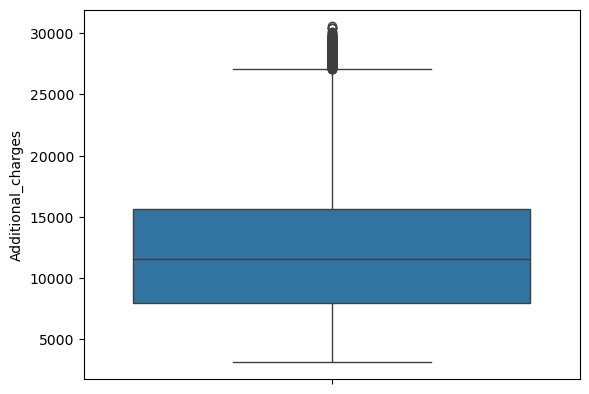

In [19]:
sns.boxplot(df['Additional_charges'])

0       0.763689
1       0.713798
2       0.697319
3       0.007698
4       1.410278
          ...   
9995    0.613759
9996    2.378969
9997    0.357384
9998    0.788920
9999    0.198688
Name: Additional_charges, Length: 9825, dtype: float64


<Axes: ylabel='Additional_charges'>

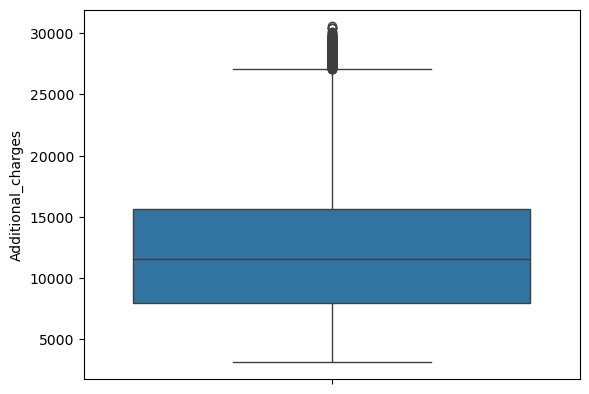

In [20]:
# This will calculate the z-score for the column (GeeksforGeeks, 2021)
z = np.abs(stats.zscore(df['Additional_charges']))
print(z)

# After finding the z-score, we set our threshold to 3, for 3 standard deviations, and remove any outliers
# outside of 3 standard deviations (GeeksforGeeks, 2021)
threshold_z = 3
 
outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)

# Boxplot after removing any outliers with more than three standard deviations
sns.boxplot(df['Additional_charges'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9825 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            9825 non-null   int64  
 1   Age                 9825 non-null   int64  
 2   Income              9825 non-null   float64
 3   Marital             9825 non-null   int64  
 4   Full_meals_eaten    9825 non-null   int64  
 5   BackPain            9825 non-null   int64  
 6   Asthma              9825 non-null   int64  
 7   Initial_days        9825 non-null   float64
 8   TotalCharge         9825 non-null   float64
 9   Additional_charges  9825 non-null   float64
 10  ReAdmis             9825 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 921.1 KB


In [22]:
df.to_csv(r"C:\Users\jtrie\OneDrive\WGU\D209\Prepared_Data_JTR_Task2.csv", index=False, header=True)

In [23]:
# Standardize the continuous data
scaler = StandardScaler()
df[['Children', 'Age', 'Income', 'Marital', 'Full_meals_eaten','TotalCharge', 'Initial_days', 'Additional_charges']] = scaler.fit_transform(df[['Children', 'Age', 'Income', 'Marital', 'Full_meals_eaten','TotalCharge', 'Initial_days', 'Additional_charges']])

In [24]:
X = df.drop(['ReAdmis'], axis= 1) # Independent variables
y = df['ReAdmis'] # Dependent variable

# Split our data into training and test set for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15, stratify = y)

frames_train = [X_train, y_train]
df_train = pd.concat(frames_train, axis = 1)
frames_test = [X_test, y_test]
df_test = pd.concat(frames_test, axis = 1)

df_train.to_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\df_train_task2.csv', index=False, header=True)
df_test.to_csv(r'C:\Users\jtrie\OneDrive\WGU\D209\df_test_task2.csv', index=False, header=True)

In [25]:
# Create the Random Forest object to use with GridSearchCV to tune our hyperparameters (RandomForestClassifier, 2024)
rfc = RandomForestRegressor()
param_grid = { 'n_estimators': np.arange(45, 50),
             'max_features': [2,3,4],
             'max_depth': [None]}

grid = GridSearchCV( rfc, param_grid, cv = 10, scoring = 'r2', return_train_score = False, verbose = 1, error_score='raise')

grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [26]:
# Check for best parameters used
print("Best params: ", grid_search.best_params_)

#Check best score for the top performing model
print("Training Score (MSE): ", grid_search.best_score_)
print("Training Score (RMSE): ", (grid_search.best_score_)**(1/2))
y_train_pred = grid_search.predict(X_train)
print("Training - R-squared score for the model: ", r2_score(y_train, y_train_pred))

Best params:  {'max_depth': None, 'max_features': 2, 'n_estimators': 47}
Training Score (MSE):  0.9382002984749256
Training Score (RMSE):  0.9686074016209693
Training - R-squared score for the model:  0.990790869865453


In [27]:
# Use the values from GridSearchCV in our Random Forest object (RandomForestClassifier, 2024)
rfc = RandomForestRegressor(n_estimators = 46, max_features = 3, max_depth = None)

model = rfc.fit(X_train, y_train)

# Check prediction accuracy
y_pred = model.predict(X_test)

print("Testing Score (MSE): ", mean_squared_error(y_test, y_pred))
print("Testing Score (RMSE): ", mean_squared_error(y_test, y_pred, squared=False))
print("Testing - R-squared score for the model: ", r2_score(y_test, y_pred))

Testing Score (MSE):  0.016733526698316955
Testing Score (RMSE):  0.12935813348343023
Testing - R-squared score for the model:  0.9280046803643797
